In [ ]:
# @title Tải thư viện
#Tải hai thư viện về để vẽ đồ thị
%pip install networkx
%pip install matplotlib

**Một số đồ thị tham khảo:**

In [9]:
# @title **Một số đồ thị tham khảo:**
#Case1:
graph1 = {
    'A': [['B', 10], ['C', 15], ['D', 20]],
    'B': [['A', 10], ['C', 25], ['D', 35]],
    'C': [['A', 15], ['B', 25], ['D', 30]],
    'D': [['A', 20], ['B', 35], ['C', 30]],
}

#Case2:
graph2 = {
    'A': [['B', 915], ['C', 1461], ['D', 343], ['E', 1407]],
    'B': [['A', 915], ['C', 1924], ['D', 1258], ['E', 545]],
    'C': [['A', 1461], ['B', 1924], ['D', 1751], ['E', 1987]],
    'D': [['A', 343], ['B', 1258], ['C', 1751], ['E', 1742]],
    'E': [['A', 1407], ['B', 545], ['C', 1987], ['D', 1742]],
}
#Case3:
graph3 = {
    'A': [['B', 10], ['D', 20]],
    'B': [['A', 10], ['C', 15], ['D', 5]],
    'C': [['B', 15], ['D', 10]],
    'D': [['A', 20], ['B', 5], ['C', 10]],
}
#Case4:
graph4 = {
    'A': [['B', 10]],
    'B': [['D', 5]],
    'C': [['D', 10]],
    'D': [['C', 10]],
}


In [11]:
# @title **Thuật toán GBFS**
graph = {
    'A': [['B', 10], ['C', 15]],
    'B': [['A', 10], ['C', 5],  ['D', 20]],
    'C': [['B', 5],  ['D', 10]],
    'D': [['B', 20],  ['C', 10]],
    
}

# Thuật toán GBFS để giải TSP
def greedy_best_firts_search(begin, data):
    fringer = []
    no_visited = list(data.keys())
    fringer.append([(0, begin)])
    close = []
    total_distance = 0
    try:
        while True:
            # Lấy cạnh có chi phí nhỏ nhất
            fringer[-1].sort(reverse=False)
            current_edge = fringer[-1].pop(0)
            close.append(current_edge)
            no_visited.remove(current_edge[1])

            # Nếu còn đỉnh chưa thăm, thêm các đỉnh láng giềng
            if no_visited:
                fringer.append([])
                for neighbor, cost in data[current_edge[1]]:
                    if neighbor in no_visited:
                        fringer[-1].append((cost, neighbor))
            else:
                # Khi tất cả các đỉnh đã thăm, quay về điểm bắt đầu
                for neighbor, cost in data[close[-1][1]]:
                    if neighbor == begin:
                        total_distance += cost
                        print("Đã tìm thấy hành trình tối ưu:")
                        for edge in close:
                            print(edge[1], end=" -> ")
                            total_distance += edge[0]
                        print(begin)
                        print(f"Tổng khoảng cách: {total_distance}")
                        return
    except Exception as e:
        print("Không tìm ra lời giải.")
        

# Giải bài toán với điểm bắt đầu là A
greedy_best_firts_search('A', graph3)


Không tìm ra lời giải.


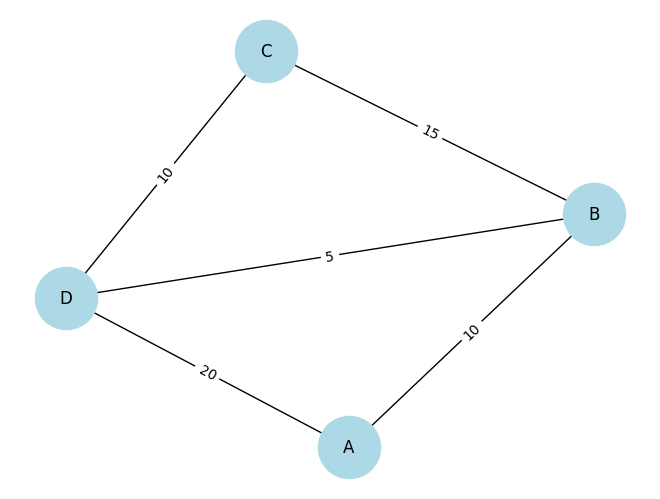

In [5]:
# @title **VẼ ĐỒ THỊ**
import networkx as nx
import matplotlib.pyplot as plt
graph = {
    'A': [['B', 10], ['C', 15], ['D', 20]],
    'B': [['A', 10], ['C', 35], ['D', 25]],
    'C': [['A', 15], ['B', 35], ['D', 30]],
    'D': [['A', 20], ['B', 25], ['C', 30]],
}

# Hàm chuyển đổi từ đồ thị dạng dictionary sang NetworkX
def convert_to_networkx(graph):
    G = nx.Graph()  # Tạo đồ thị không có hướng
    for node, edges in graph.items():
        for neighbor, weight in edges:
            # Thêm cạnh vào đồ thị, với trọng số là 'weight'
            G.add_edge(node, neighbor, weight=weight)
    return G

# Hàm vẽ đồ thị
def draw_graph(G):
    pos = nx.spring_layout(G)  # Vị trí các nút
    labels = nx.get_edge_attributes(G, 'weight')  # Lấy trọng số của các cạnh

    # Vẽ đồ thị với các trọng số
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()
G = convert_to_networkx(graph3)
draw_graph(G)